In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd

import ipywidgets as widgets
import folium
from folium import plugins

In [2]:
df = pd.read_csv('data/sf_crime.zip')

In [3]:
limit=1000
district = ['BAYVIEW', 'NORTHERN']
category = ['VANDALISM', 'ASSAULT', 'ROBBERY']

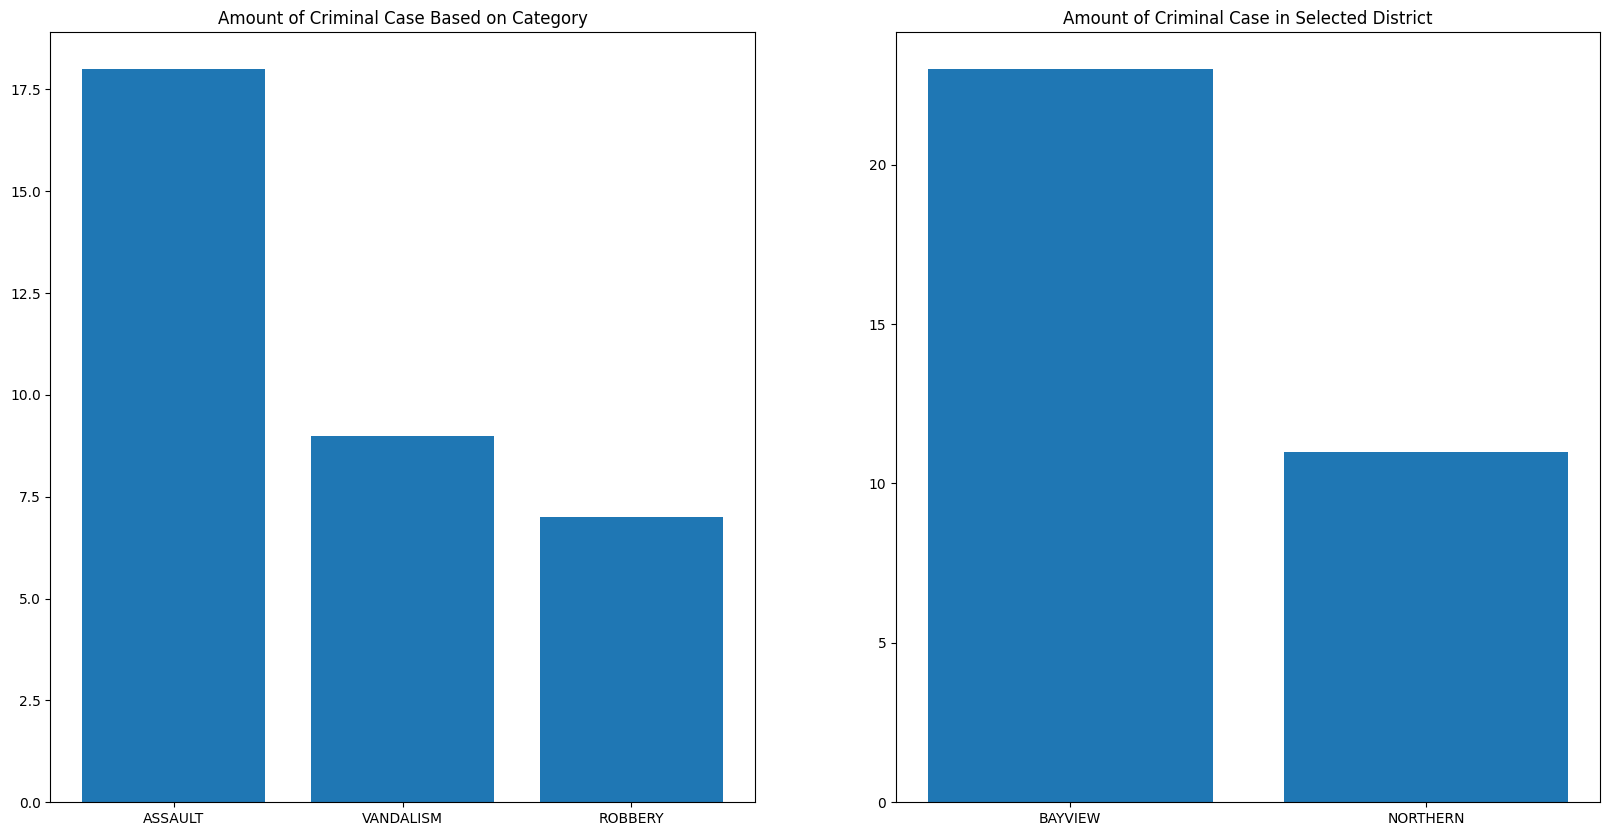

In [4]:
df = df.iloc[0:limit,:]
    
latitude = 37.77
longitude = -122.42
    
df_dist = df.loc[df['PdDistrict'].isin(np.array(district))]
df_category = df_dist.loc[df_dist['Category'].isin(np.array(category))]
    
cat_unique = df_category['Category'].value_counts()
cat_unique = cat_unique.reset_index()
    
dist_unique = df_category['PdDistrict'].value_counts()
dist_unique = dist_unique.reset_index()
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
# create map and dosplay it
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)
    
incidents = folium.plugins.MarkerCluster().add_to(sf_map)
    
# look through the df and add each data point to the mark cluster
for lat, lng, label in zip(df_category['Y'], df_category['X'], df_category['Category']):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)
#show map
display(sf_map)
    
ax1.bar(cat_unique['index'], cat_unique['Category'])
ax1.set_title('Amount of Criminal Case Based on Category')
ax2.bar(dist_unique['index'], dist_unique['PdDistrict'])
ax2.set_title('Amount of Criminal Case in Selected District')
    
plt.show()

In [5]:
# in terminal run:
# mercury watch sf_crime_mercury.ipynb (notebook_name)

---